# Лабораторная работа №4: Выделение контуров на изображениях.
## Вариант: №9
## Выполнил: Соколов Роман
## Группа: 6131-010402D

In [1]:
from itertools import product
from warnings import filterwarnings

import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from matplotlib.pyplot import *
from tqdm.notebook import tqdm

filterwarnings("ignore")
%matplotlib inline

In [2]:
def show_image(image):
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) if len(
        image.shape) == 3 else plt.imshow(image, cmap='gray')

In [3]:
def convolution(image, kernel):
    __kernel = np.flipud(np.fliplr(kernel))
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape
    output_image = np.zeros((image_rows, image_cols))

    if kernel_cols % 2 == 0:
        output_image_cols = image_cols + (kernel_cols // 2)
        copy_cols = (0, image_cols)
    else:
        output_image_cols = image_cols + 2 * (kernel_cols // 2)
        copy_cols = (kernel_cols // 2, output_image_cols - (kernel_cols // 2))

    if kernel_rows % 2 == 0:
        output_image_rows = image_rows + (kernel_rows // 2)
        copy_rows = (0, image_rows)
    else:
        output_image_rows = image_rows + 2 * (kernel_rows // 2)
        copy_rows = (kernel_rows // 2, output_image_rows - (kernel_rows // 2))

    img = np.zeros((output_image_rows, output_image_cols))
    img[copy_rows[0]: copy_rows[1], copy_rows[0]: copy_cols[1]] = image

    for i, j in tqdm(np.ndindex((image_rows, image_cols))):
        output_image[i, j] = np.sum(
            __kernel * img[i: i + kernel_rows, j: j + kernel_cols])

    clear_output()
    return output_image

In [4]:
def grayscale_image(image):
    return (np.dot(image[..., :3], np.array([0.2126, 0.7152, 0.0722]))).astype(np.uint8)

In [5]:
def threshold_processing(grayscale_image, threshold):
    return np.vectorize(lambda x: 1 if x > threshold else 0)(grayscale_image).astype(np.uint8)

# Задание 1.

Исходное изображение:


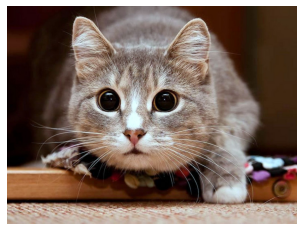

In [8]:
image = cv2.imread('image/cat1.jpg')
print('Исходное изображение:')
show_image(image)

Преобразованное изображение в градации серого:


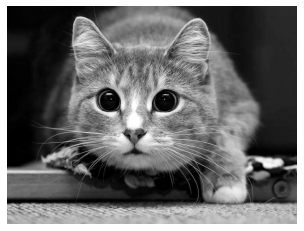

In [9]:
print('Преобразованное изображение в градации серого:')
gray_img = grayscale_image(image)
show_image(gray_img)

# Задание 2.

Преобразованное изображение в градации серого:


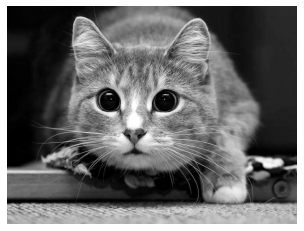

In [10]:
print('Преобразованное изображение в градации серого:')
show_image(gray_img)

In [33]:
x = convolution(gray_img, np.array([[-1], [1]]))
y = convolution(gray_img, np.array([[-1, 1]]))
gradient_image = np.maximum(np.fabs(x), np.fabs(y)).astype(np.int8)

Контуры изображения методом градиента:


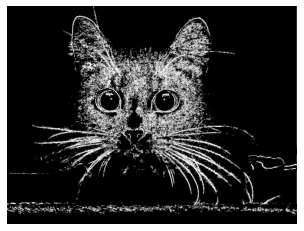

In [34]:
print('Контуры изображения методом градиента:')
show_image(threshold_processing(gradient_image, 15))

# Задание 3.

In [11]:
def laplas(image, kernel):
    image_rows, image_cols = image.shape
    output_image = np.zeros((image_rows, image_cols))

    X = convolution(image, kernel)
    Y = convolution(image, np.flip(kernel.T, axis=0))

    output_image = np.sqrt(np.square(X) + np.square(Y))

    return output_image

Преобразованное изображение в градации серого:


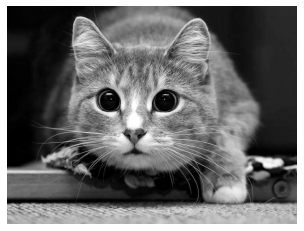

In [12]:
print('Преобразованное изображение в градации серого:')
show_image(gray_img)

оператор Лапласа:


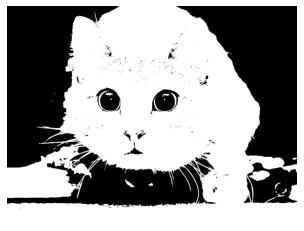

In [17]:
kernel = np.array([
    [0, 1, 0],
    [1,  -4,  1],
    [0,  1,  0],
])

img_lap = laplas(gray_img, kernel)
print('оператор Лапласа:')
show_image(threshold_processing(img_lap, 100))

# Задание 4.

Преобразованное изображение в градации серого:


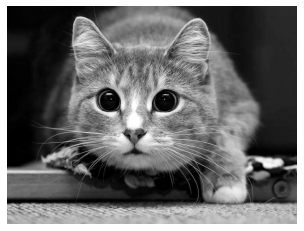

In [14]:
print('Преобразованное изображение в градации серого:')
show_image(gray_img)

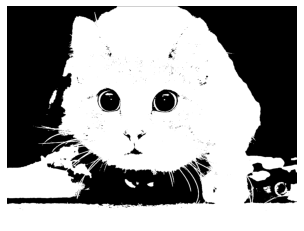

In [15]:
kernel1 = 1 / 6 * np.array([
    [-1, -1,  -1],
    [0, 0, 0],
    [1, 1,  1]
])

print('Изображение, которое получено в результате метода согласованием:')
sogl_meth1 = np.fabs(convolution(gray_img, kernel1))
show_image(threshold_processing(sogl_meth1, 10))

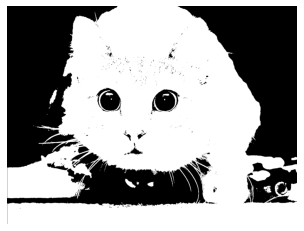

In [16]:
kernel2 = 1 / 6 * np.array([
    [-1, 0,  1],
    [-1, 0, 1],
    [-1, 0,  1]
])

print('Изображение, которое получено в результате метода согласованием:')
sogl_meth2 = np.fabs(convolution(gray_img, kernel2))
show_image(threshold_processing(sogl_meth2, 10))